# Hu_moments

In [1]:
import sys;
sys.path.append("/Users/Giatti/Desktop/AI篆刻") 


In [2]:
import os
print(os.path.abspath('.')) # 得到当前文件所在目录的绝对路径

import cv2
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


/Users/Giatti/Desktop/AI篆刻/ImageMoments


[ 64 255 255 ...  64 255 255]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


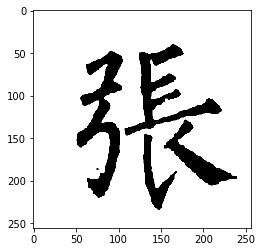

In [43]:
fp = 'Zhang.png'
img = cv2.imread(fp)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray_nonzero = img_gray.ravel()[np.flatnonzero(img_gray)]
print(img_gray_nonzero)
# print(np.flatnonzero(img_gray))

ret, img_binary = cv2.threshold(img_gray, 127, 1, cv2.THRESH_BINARY)
print(img_binary)
# print(np.flatnonzero(binary))
# print(img_gray.shape)
plt.imshow(img_gray,'gray_r')
plt.show()

In [44]:
img_binary.sum()

9726

In [75]:
  
def test(img):
    moments = cv2.moments(img)
    humoments = cv2.HuMoments(moments)
    # humoments = no.log(np.abs(humoments)) # 同样建议取对数
    print(humoments)
 
# if __name__ == '__main__':
#     t1 = datetime.now()   
#     fp = './ImageMoments/Zhang.png'
#     img = cv2.imread(fp)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     test(img_gray)
#     print (datetime.now() - t1)

test(img_binary)

[[ 4.73592495e-01]
 [ 9.45389104e-03]
 [ 6.01699307e-03]
 [ 8.16495671e-04]
 [ 1.13996261e-06]
 [ 7.19384330e-05]
 [-1.40559968e-06]]


In [77]:
def humoments(img_gray):
    '''
    由于7个不变矩的变化范围很大,为了便于比较,可利用取对数的方法进行数据压缩;同时考虑到不变矩有可能出现负值的情况,因此,在取对数之前先取绝对值
    经修正后的不变矩特征具有平移 、旋转和比例不变性
    '''
    # 标准矩定义为m_pq = sumsum(x^p * y^q * f(x, y))
    row, col = img_gray.shape
    #计算图像的0阶几何矩
    m00 = img_gray.sum()
    m10 = m01 = 0
    #　计算图像的二阶、三阶几何矩
    m11 = m20 = m02 = m12 = m21 = m30 = m03 = 0
    for i in range(row):
        m10 += (i * img_gray[i]).sum()
        m20 += (i ** 2 * img_gray[i]).sum()
        m30 += (i ** 3 * img_gray[i]).sum()
        for j in range(col):
            m11 += i * j * img_gray[i][j]
            m12 += i * j ** 2 * img_gray[i][j]
            m21 += i ** 2 * j * img_gray[i][j]
    for j in range(col):
        m01 += (j * img_gray[:, j]).sum()
        m02 += (j ** 2 * img_gray[:, j]).sum()
        m03 += (j ** 3 * img_gray[:, j]).sum()
        
    # 由标准矩我们可以得到图像的"重心"
    x0 = m10 / m00
    y0 = m01 / m00
    # 计算图像的二阶中心矩、三阶中心矩
    u00 = m00
    u01 = u10 = 0
    u11 = m11-x0*m01
    u20 = m20 - x0*m10
    u02 = m02 - y0*m01
    u21 = m21 - 2*x0*m11 - y0*m20 + 2*(x0**2)*m01
    u12 = m12 - 2*y0*m11 - x0*m02 + 2*(y0**2)*m10
    u30 = m30 - 3*x0*m20 + 2*(x0**2)*m10
    u03 = m03 - 3*y0*m02 + 2*(y0**2)*m01
    
    # 计算图像的归格化中心矩
    # yij = uij/(u00**(1+(i+j)/2))
    y20 = u20 / (u00**2)
    y02 = u02 / (u00**2)
    y11 = u11 / (u00**2)
    y30 = u30 / (u00**2.5)
    y03 = u03 / (u00**2.5)
    y12 = u12 / (u00**2.5)
    y21 = u21 / (u00**2.5)

    # 计算图像的七个不变矩
    h1 = y20 + y02
    h2 = (y20 - y02) ** 2 + 4 * y11 ** 2
    h3 = (y30 - 3 * y12) ** 2 + (3 * y21 - y03) ** 2
    h4 = (y30 + y12) ** 2 + (y21 + y03) ** 2
    h5 = (y30 - 3 * y12) * (y30 + y12) * ((y30 + y12) ** 2 - 3 * (y21 + y03) ** 2) + (3 * y21 - y03) * (y21 + y03) \
        * (3 * (y30 + y12) ** 2 - (y21 + y03) ** 2)
    h6 = (y20 - y02) * ((y30 + y12) ** 2 - (y21 + y03) ** 2) + 4 * y11 * (y30 + y12) * (y21 + y03)
    h7 = (3 * y21 - y03) * (y30 + y12) * ((y30 + y12) ** 2 - 3 * (y21 + y03) ** 2) + (3 * y12 - y30) * (y21 + y03) \
        * (3 * (y30 + y12) ** 2 - (y21 + y03) ** 2)
    inv_m7 = [h1, h2, h3, h4, h5, h6, h7]

    return inv_m7
 
# if __name__ == '__main__':
#     t1 = datetime.now()
#     fp = '/home/mamq/images/3.jpg'
#     img = cv2.imread(fp)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     print humoments(img_gray)
#     print datetime.now() - t1

In [78]:
print(humoments(img_binary))

[0.47359249486981264, 0.009453891044476201, 0.006016993068560849, 0.0008164956710095591, 1.1399626149962545e-06, 7.193843303907277e-05, 1.4055996816700706e-06]


In [68]:
fp = 'Zhang.png'
img_gray = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)


ret, img_binary = cv2.threshold(img_gray, 127, 1, cv2.THRESH_BINARY)
row,col = img_binary.shape
p = 20 
q = 20
m = m_pq(img_binary,p,q)



In [67]:
def m_pq(f, p, q):
    """
    Two-dimensional (p+q)th order moment of image f(x,y)
    where p,q = 0, 1, 2, ...
    """
    m = np.zeros((p,q))
    # Loop in f(x,y)
    for i in range(0,p):
        for j in range(0,q):
            for x in range(0, len(f)):
                for y in range(0, len(f[0])):
                    m[i][j] += ((x+1)**i)*((y+1)**j)*f[x][y]
    return m


In [85]:
def centroid(m):
    """
    Computes the centroid of image f(x,y)
    """
    return [m[1][0]/m[0][0], m[0][1]/m[0][0]]

In [86]:
def u_pq(f, p, q):
    """
    Centroid moment invariant to rotation.
    This function is equivalent to the m_pq but translating the centre of image
    f(x,y) to the centroid.
    """
    u = 0
    centre = centroid(f)
    for x in range(0, len(f)):
        for y in range(0, len(f[0])):
            u += ((x-centre[0]+1)**p)*((y-centre[1]+1)**q)*f[x][y]
    return u

In [87]:
def hu(f):
    """
    This function computes Hu's seven invariant moments.
    """
    u_00 = u_pq(f, 0, 0)

    # Scale invariance is obtained by normalization.
    # The normalized central moment is given below
    eta = lambda f, p, q: u_pq(f, p, q)/(u_00**((p+q+2)/2))

    # normalized central moments used to compute Hu's seven moments invariat
    eta_20 = eta(f, 2, 0)
    eta_02 = eta(f, 0, 2)
    eta_11 = eta(f, 1, 1)
    eta_12 = eta(f, 1, 2)
    eta_21 = eta(f, 2, 1)
    eta_30 = eta(f, 3, 0)
    eta_03 = eta(f, 0, 3)

    # Hu's moments are computed below
    phi_1 = eta_20 + eta_02
    phi_2 = 4*eta_11 + (eta_20-eta_02)**2
    phi_3 = (eta_30 - 3*eta_12)**2 + (3*eta_21 - eta_03)**2
    phi_4 = (eta_30 + eta_12)**2 + (eta_21 + eta_03)**2
    phi_5 = (eta_30 - 3*eta_12)*(eta_30 + eta_12)*((eta_30+eta_12)**2 - 3*(eta_21+eta_03)**2) + (3*eta_21 - eta_03)*(eta_21 + eta_03)*(3*(eta_30 + eta_12) - (eta_21 + eta_03)**2)
    phi_6 = (eta_20 - eta_02)*((eta_30 + eta_12)**2 - (eta_21 + eta_03)**2) + 4*eta_11*(eta_30 + eta_12)*(eta_21 + eta_03)
    phi_7 = (3*eta_21 - eta_03)*(eta_30 + eta_12)*((eta_30 + eta_12)**2 - 3*(eta_21 + eta_03)**2) - (eta_30 - 3*eta_12)*(eta_21 + eta_03)*(3*(eta_30 + eta_12)**2 - (eta_21 + eta_03)**2)

    return [phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7]

In [88]:
hu(img_binary)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in ubyte_scalars
  """


[nan, nan, nan, nan, nan, nan, nan]